#INTRODUCTION TO SPACY

###INSTALLATION

In [ ]:
!pip install -U spacy

In [ ]:
!pip install -U spacy-lookups-data
!python -mspacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 5.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


###TOKENIZATION
**Tokenization** is the task of splitting a text into a meaningful segments called **Tokens**

In [ ]:
import spacy

In [ ]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
text='Apple is looking for buy a U.K. Startup. Government has given permission for acquisition'

In [ ]:
doc=nlp(text)
doc

Apple is looking for buy a U.K. Startup. Government has given permission for acquisition

In [ ]:
for sent in doc.sents: 
  print(sent)

Apple is looking for buy a U.K. Startup.
Government has given permission for acquisition


###PHRASE MATCHING

In [ ]:
from spacy.tokens import Span
from spacy.matcher import Matcher

In [ ]:
text=' Hello, world! hello world'
doc=nlp(text)

In [ ]:
for token in doc:
  print(token)

 
Hello
,
world
!
hello
world


In [ ]:
pattern=[{'LOWER':'hello'},{'IS_PUNCT':True, 'OP':'?'},{'LOWER':'world'}]

In [ ]:
matcher=Matcher(nlp.vocab)
matcher.add('hw', [pattern], on_match=None)
matches = matcher(doc)
matches

[(17790654416186116455, 1, 4), (17790654416186116455, 5, 7)]

In [ ]:
for match_id,start,end in matches:
  string_id=nlp.vocab.strings[match_id]
  span=doc[start:end]
  print(match_id,string_id,start,end,span.text)

17790654416186116455 hw 1 4 Hello, world
17790654416186116455 hw 5 7 hello world


###PROCESSING A PIPELINE IN SPACY
The pipeline used by the default models consists of a tagger, a parser and an entity recogniser.Each pipeline component returns the processed Doc,which is then passed on to the next component
##Tips for processing
1)Process the text as a stream using nlp.Pipe and buffer them in batches,instead of one by one.This is usually much more efficient.

2)Only apply the component you need.To prevent this, disable keyword argument to disable component you don't need.

In [ ]:
text=['net income was $9.4 million compared to the prior year of 2.7$ million',
      'revenue exceeds twelve billion dollars with a loss of $1b']

In [ ]:
%%timeit
docs=nlp.pipe(text,disable=['parser','tagger'])
for doc in docs:
  for ent in doc.ents:
    print(ent.text,ent.label)
  print()

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394



/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the 

In [ ]:
%%timeit
docs=nlp.pipe(text)
for doc in docs:
  for ent in doc.ents:
    print(ent.text,ent.label)
  print()

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the prior year 391
2.7$ million 394

twelve billion dollars 394
1b 394

$9.4 million 394
the 

###HASHTAG AND EMOJI DETECTION

In [ ]:
pos_emoji = ["😀", "😃", "😂", "🤣", "😊", "😍"]  # Positive emoji
neg_emoji = ["😞", "😠", "😩", "😢", "😭", "😒"]  # Negative emoji

In [ ]:
pos=[[{'ORTH':emoji}] for emoji in pos_emoji]
neg=[[{'ORTH':emoji}] for emoji in neg_emoji]

In [ ]:
pos,neg

([[{'ORTH': '😀'}],
  [{'ORTH': '😃'}],
  [{'ORTH': '😂'}],
  [{'ORTH': '🤣'}],
  [{'ORTH': '😊'}],
  [{'ORTH': '😍'}]],
 [[{'ORTH': '😞'}],
  [{'ORTH': '😠'}],
  [{'ORTH': '😩'}],
  [{'ORTH': '😢'}],
  [{'ORTH': '😭'}],
  [{'ORTH': '😒'}]])

In [ ]:
matcher=Matcher(nlp.vocab)

In [ ]:
def label_sentiment(matcher,doc,i,matches):
  match_id,start,end=matches[i]
  if doc.vocab.strings[match_id]=='happy':
    doc.sentiment += 0.1
  elif doc.vocab.strings[match_id]=='sad':
    doc.sentiment -= 0.1

In [ ]:
matcher.add('happy',pos,on_match=label_sentiment)
matcher.add('sad',neg,on_match=label_sentiment)

In [ ]:
matcher.add('HASHTAG',[[{'ORTH':'#'},{'IS_ASCII':True}]])

In [ ]:
doc=nlp('Congratulations😃 guys you are about to complete your level 3😍😍 farewell 😭 #kshitij')

In [ ]:
matches=matcher(doc)

In [ ]:
for match_id,start,end in matches:
  string_id=nlp.vocab.strings[match_id]
  span=doc[start:end]
  print(string_id,span.text)

happy 😃
happy 😍
happy 😍
sad 😭
HASHTAG #kshitij


In [ ]:
doc.sentiment#(3 happy [+0.3] and 1 sad [-0.1],so we get 0.2)

0.20000001788139343

#COMPLETE TEXT PREPROCESSING























###GENERAL FEATURES EXTRACTION

*   File loading
*   Word counts
*   Character counts
*   Average character count
*   Stop word count
*   Count **#**Hastags and **@**mention
*   If numeric digits are present
*   Upper case word counts

###PREPROCESSING AND CLEANING


*   Lower case conversion
*   Contraction to expansion
*   Emails removals and counts
*   URLs removals and counts
*   Removal of RT
*   Removal of special characters
*   Removal of multiple spaces
*   Removal of HTML tags
*   Removal of accented characters
*   Removal of stop words
*   Conversion into base form of words
*   Common occuring words removal
*   Word cloud
*   Spelling correction
*   Tokenization
*   Lemmatization
*   Detecting entities using NER
*   Noun detection
*   Language detection
*   Sentence detection
*   Using inbuilt sentiment classifier.

In [ ]:
import pandas as pd
import numpy as np
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv')
print(df.shape)
df.head()

(4000, 2)


,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0


In [ ]:
df['sentiment'].value_counts()

0    2000
1    2000
Name: sentiment, dtype: int64

###GENERAL FEATURES EXTRACTION


####WORD COUNTS

In [ ]:
len('this is text'.split())

3

In [ ]:
# df['word_counts']=df['twitts'].apply(lambda x:len([t for t in x.split() if t in STOP_WORDS]))
df['word_counts']=df['twitts'].apply(lambda x:len(str(x).split()))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts
2439,@UrbaneGorilla I'll check out TOPS and FREE--t...,1,18
292,"tired, frustrated, cranky blahhh its monday.",0,6
1090,@simplymallory you be naht online D: sighs i...,0,15
349,I remember when Friday nights were about takin...,0,24
603,left my phone at PacSun. no texting for a who...,0,12


In [ ]:
print('Max word count:',df['word_counts'].max(),'\tMin word count:',df['word_counts'].min())

Max word count: 32 	Min word count: 1


In [ ]:
#getting all the 1 word twitts
df[df['word_counts']==1].head(5)

,twitts,sentiment,word_counts
385,homework,0,1
691,@ekrelly,0,1
1124,disappointed,0,1
1286,@officialmgnfox,0,1
1325,headache,0,1


####CHARACTER COUNT

In [ ]:
len('this is a')

9

In [ ]:
def char_counts(x):
  s=x.split()
  x=' '.join(s)
  return len(x)

In [ ]:
char_counts('this is a')

9

In [ ]:
df['char_counts']=df['twitts'].apply(lambda x:char_counts(str(x)))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts
3255,Working at the &quot;The Bunker PB.Com&quot; t...,1,23,143
3350,"doesn't matter, got new password now",1,6,36
3233,yes! they are playing demi later on switch,1,8,42
1810,Watching tv at home all alone,0,6,29
2153,@viky_faxerfeit Oh okay. xD But I'll vote for ...,1,9,50


In [ ]:
print('Max char count:',df['char_counts'].max(),'\tMin char count:',df['char_counts'].min())

Max char count: 203 	Min char count: 6


####AVERAGE WORD LENGTH

In [ ]:
x='this is' #6/2=3
y='thankyou guys'#12/2=6

In [ ]:
df['avg_word_len']=df['char_counts']/df['word_counts']

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len
2578,@thebadcat thank you,1,3,20,6.666667
2501,Ain't to sure what i'm ment to be doing on her...,1,12,54,4.500000
2675,@DaniAlberti I used to love Mark McGrath too! ...,1,21,115,5.476190
1023,@LaurenConrad's last episode,0,3,28,9.333333
545,If its the person i think it is...why the fuck...,0,26,137,5.269231


####STOP WORDS COUNT

In [ ]:
print(STOP_WORDS)
len(STOP_WORDS)

{'must', 'twelve', 'up', 'always', 'noone', 'unless', 'in', 'onto', 'somewhere', 'made', 'mostly', 'can', 'hereupon', 'also', 'your', 'alone', 'various', 'hundred', 'eleven', '‘re', 'rather', 'someone', 'them', '‘m', 'to', 'others', 'serious', 'whom', 'now', 'because', 'their', 'upon', 'between', 'thereafter', 'everything', 'he', 'is', '‘ll', 'give', 'does', 'we', 'several', 'whole', 'off', 'please', 'beyond', 'nothing', 'those', 'hence', 'call', 'not', 'down', 'yours', 'too', 'against', 'who', 'top', 'moreover', 'get', 'are', 'side', 'put', 'via', 'nine', '’d', 'sixty', 'whether', 'go', 'elsewhere', 'afterwards', 'much', 'whose', 'being', 'which', 'becoming', 'therefore', 'have', 'or', 'neither', 'quite', 'themselves', 'should', 'besides', 'has', 'thence', 'wherever', 'whereas', 'everyone', 'some', 'then', 'using', 'although', 'another', 'whence', 'seeming', 'it', 'seemed', "'s", 'ourselves', 'thereupon', 'would', 'ca', 'during', 'along', 'regarding', 'as', 'nowhere', 'therein', 'none

326

In [ ]:
x='this is the text data'
x.split()

['this', 'is', 'the', 'text', 'data']

In [ ]:
[t for t in x.split() if t in STOP_WORDS]

['this', 'is', 'the']

In [ ]:
len([t for t in x.split() if t in STOP_WORDS])

3

In [ ]:
df['stop_words']=df['twitts'].apply(lambda x:[t for t in x.split() if t in STOP_WORDS])

In [ ]:
df['stop_words_len']=df['twitts'].apply(lambda x:len([t for t in x.split() if t in STOP_WORDS]))

In [ ]:
df.sample(1)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,stop_words
3653,@bellavitarox I didn't know you were going to ...,1,10,54,5.4,3,"[you, were, to]"


####COUNT HASHTAGS AND @MENTIONS

In [ ]:
x='this is #hastag and this is @mention'
x.split()

['this', 'is', '#hastag', 'and', 'this', 'is', '@mention']

In [ ]:
[t for t in x.split() if t.startswith('@')]

['@mention']

In [ ]:
len([t for t in x.split() if t.startswith('@')])

1

In [ ]:
df['hashtags_count']=df['twitts'].apply(lambda x:len([t for t in x.split() if t.startswith('#')]))
df['mentions_count']=df['twitts'].apply(lambda x:len([t for t in x.split() if t.startswith('@')]))

In [ ]:
df.sample(1)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,stop_words,hashtags_count,mentions_count
292,"tired, frustrated, cranky blahhh its monday.",0,6,44,7.333333,1,[its],0,0


####IF NUMERIC DIGITS ARE PRESENT IN TWITTS

In [ ]:
x='this is 1 and 2'
x.split()

['this', 'is', '1', 'and', '2']

In [ ]:
print(x.split()[3].isdigit())#and
print(x.split()[4].isdigit())#2

False
True


In [ ]:
[t for t in x.split() if t.isdigit()]

['1', '2']

In [ ]:
df['numeric_count']=df['twitts'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))

In [ ]:
df.sample(1)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,stop_words,hashtags_count,mentions_count,numeric_count
2417,@audreywallis I LOVE that movie,1,5,31,6.2,1,[that],0,1,0


####UPPER CASE WORDS COUNT

In [ ]:
x='I AM HAPPY'
y='i am happy'

In [ ]:
print([t for t in x.split() if t.isupper()])
len([t for t in x.split() if t.isupper()])

['I', 'AM', 'HAPPY']


3

In [ ]:
df['uppercase_word_count']=df['twitts'].apply(lambda x:len([t for t in x.split() if t.isupper()]))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,stop_words,hashtags_count,mentions_count,numeric_count,uppercase_count,uppercase_word_count
2806,@tineymarie thanks.,1,2,19,9.500000,0,[],0,1,0,0,0
1178,"UP, my eyes hurt",0,4,16,4.000000,1,[my],0,0,0,1,1
2610,ENJOYIN THIS FRIDAY EVEN THO THA WEATHER SUCKZ...,1,20,114,5.700000,0,[],0,0,0,20,20
829,At Pune airport. Flight delayed by 1hr 35min.,0,8,45,5.625000,1,[by],0,0,0,0,0
2252,"btw, is it just me or do others also get the i...",1,29,136,4.689655,21,"[is, it, just, me, or, do, others, also, get, ...",0,1,0,0,0


###PREPROCESSING AND CLEANING

####LOWER CASE CONVERSION

In [ ]:
x='THIS IS TEXT'

In [ ]:
x.lower()

'this is text'

In [ ]:
x=45.0
str(x).lower()

'45.0'

In [ ]:
#CONVERTING ALL THE LETTERS IN TWITTS TO LOWER CASE
df['twitts']=df['twitts'].apply(lambda x:str(x).lower())

In [ ]:
df.sample(1)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,stop_words,hashtags_count,mentions_count,numeric_count,uppercase_count,uppercase_word_count
1327,i want holiday so badly,0,5,23,4.6,2,"[i, so]",0,0,0,0,0


####CONTRACTION TO EXPANSION

In [ ]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring'}

In [ ]:
x="i'm don't he'll" #i am do not he will

In [ ]:
def cont_to_exp(x):
  if type(x) is str:
    for key in contractions:
      value=contractions[key]
      x=x.replace(key,value)
    return x
  else:
    return x

In [ ]:
cont_to_exp(x)

'i am do not he will'

In [ ]:
%%timeit
df['twitts']=df['twitts'].apply(lambda x: cont_to_exp(x))

10 loops, best of 5: 92.5 ms per loop


In [ ]:
df.sample(1)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,stop_words,hashtags_count,mentions_count,numeric_count,uppercase_count,uppercase_word_count
1160,pea and ham soup recipe http://bit.ly/tkpz9 my...,0,16,91,5.6875,3,"[and, to, it]",0,0,0,1,1


####COUNT AND REMOVE EMAILS

In [ ]:
import re

In [ ]:
df[df['twitts'].str.contains('hotmail.com')]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,stop_words,hashtags_count,mentions_count,numeric_count,uppercase_count,uppercase_word_count
3713,@securerecs arghh me please markbradbury_16@h...,1,5,55,11.0,0,[],0,1,0,0,0


In [ ]:
df['emails']=df['twitts'].apply(lambda x:re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+._-]+\b)',x))

In [ ]:
df['emails_count']=df['emails'].apply(lambda x:len(x))

In [ ]:
df['twitts']=df['twitts'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+._-]+)',"",x))

In [ ]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,stop_words,hashtags_count,mentions_count,numeric_count,uppercase_count,uppercase_word_count,emails,emails_count
3713,@securerecs arghh me please,1,5,55,11.0,0,[],0,1,0,0,0,[markbradbury_16@hotmail.com],1


####COUNT URLs AND REMOVE IT

In [ ]:
#COUNTING URL
df['url_flags']=df['twitts'].apply(lambda x:len(re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [ ]:
#REMOVING URL by replacing it with ''
df['twitts']=df['twitts'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','', x))

In [ ]:
df[df['url_flags']>1].head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,stop_words,hashtags_count,mentions_count,numeric_count,uppercase_count,uppercase_word_count,emails,emails_count,url_flags
427,we want api! #wolframalpha. doc says no seman...,0,12,120,10.000000,2,"[we, no]",1,0,0,1,1,[],0,2
3826,helmet - unsung to start your day,1,9,84,9.333333,2,"[to, your]",0,0,0,0,0,[],0,2


####REMOVAL OF RT
rt is a format(read text)

In [ ]:
df[df['twitts'].str.contains(r'\brt\b')]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,stop_words,hashtags_count,mentions_count,numeric_count,uppercase_count,uppercase_word_count,emails,emails_count,url_flags
1051,oh no...my lab is limping. something wrong w/ ...,0,20,101,5.05,6,"[is, her, front, it, on, the]",0,0,0,0,0,[],0,0
2108,@emilyroseartist thanks for the rt,1,5,34,6.80,2,"[for, the]",0,1,0,0,0,[],0,0


####REMOVAL OF SPECIAL CHARACTERS

In [ ]:
df['twitts']=df['twitts'].apply(lambda x: re.sub(r'[^\w]+','',x))

####REMOVAL OF MULTIPLE SPACES/WHITESPACES

In [ ]:
x=  'hi     hello      how are you'
' '.join(x.split())

'hi hello how are you'

In [ ]:
df['twitts']=df['twitts'].apply(lambda x:' '.join(x.split()))

####REMOVAL OF HTML TAGS

In [ ]:
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
x='<html><h1> thanks for watching </h1></html>'

In [ ]:
x.replace('<html><h1>','').replace('</h1></html>','')

' thanks for watching '

In [ ]:
BeautifulSoup(x,'lxml').text.strip()#text or get_text()

'thanks for watching'

In [ ]:
%%time
df['twitts']=df['twitts'].apply(lambda x: BeautifulSoup(x,'lxml').text.strip())

CPU times: user 1.32 s, sys: 30.1 ms, total: 1.35 s
Wall time: 1.75 s


####REMOVAL OF ACCENTED CHARACTERS

In [ ]:
import unicodedata

In [ ]:
x='résumé'

In [ ]:
def remove_accented_chars(x):
  x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
  return x

In [ ]:
remove_accented_chars(x)

'resume'

In [ ]:
df['twitts']=df['twitts'].apply(lambda x:remove_accented_chars(x))

####REMOVAL OF STOP WORDS

In [ ]:
df['twitts_no_stop']=df['twitts'].apply(lambda x:' '.join([t for t in x.split() if t not in STOP_WORDS]))

####CONVERSION INTO BASE/ROOT FORM OF WORDS

In [ ]:
x='this is chocolate. what is times? this balls are rolling'

In [ ]:
def make_to_base(x):
  x=str(x)
  x_list=[]
  doc=nlp(x)
  for token in doc:
    lemma=token.lemma_
    if lemma=='-PRON-' or lemma=='be':
      lemma=token.text
    x_list.append(lemma)
  return ' '.join(x_list)


In [ ]:
make_to_base(x)

'this is chocolate . what is time ? this ball are roll'

In [ ]:
df['twitts']=df['twitts'].apply(lambda x:make_to_base(x))

####REMOVAL OF COMMON OCCURING WORDS

In [ ]:
#run raw file before executing these section codes
text=' '.join(df['twitts'])
len(text)

260101

In [ ]:
text=text.split()
len(text)

41086

In [ ]:
freq_comm=pd.Series(text).value_counts()
f20=freq_comm[:20]
f20

with    260
be      255
I'm     251
but     248
just    225
not     221
get     197
this    181
-       177
all     171
up      170
like    170
go      170
out     165
are     160
your    159
day     152
love    145
got     144
good    133
dtype: int64

In [ ]:
df['twitts']=df['twitts'].apply(lambda x:' '.join([t for t in x.split() if t not in f20]))

####REMOVAL OF RARE WORDS

In [ ]:
r20=freq_comm.tail(20)
r20

wait...that    1
Farrah!        1
up..           1
darted         1
bedroom        1
floor          1
@shaycarl      1
banner         1
hair!!         1
gross...umm    1
29th           1
:-P            1
disneey        1
channel,       1
myspace,       1
wthck          1
outtttt        1
slack.         1
?&lt;3         1
hope!          1
dtype: int64

In [ ]:
df['twitts']=df['twitts'].apply(lambda x:' '.join([t for t in x.split() if t not in r20]))

####WORD CLOUD VISULAIZATION

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
text=' '.join(df['twitts'])
len(text)

244610

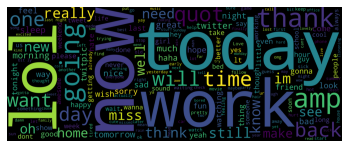

In [ ]:
wc=WordCloud(width=5000,height=2000).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

####SPELLING CORRECTION

In [ ]:
!pip install -U textblob

     |████████████████████████████████| 636 kB 5.2 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob

In [ ]:
x='thankks foorr wattching'
x=TextBlob(x).correct()
x

TextBlob("thanks for watching")

####TOKENIZATION USING TEXTBLOB

In [ ]:
x='thanks#watching this video. please like it'

In [ ]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [ ]:
doc=nlp(x)
for token in doc:
  print(token)

thanks#watching
this
video
.
please
like
it


####DETECTING NOUNS

In [ ]:
x='Breaking news: Donald trump, the president of the USA is looking to sign a deal to mine the moon'
doc=nlp(x)

In [ ]:
for noun in doc.noun_chunks:
  print(noun)

Donald trump
the president
the USA
a deal
the moon


####LANGUAGE TRANSLATION AND DETECTION

In [ ]:
tb=TextBlob(x)

In [ ]:
# tb.detect_language()

####USING TEXTBLOB's INBUILT SENTIMENT CLASSIFIER

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
x='we all stands together. we are gonna win this fight'

In [ ]:
tb=TextBlob(x,analyzer=NaiveBayesAnalyzer())

In [ ]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.9180581552428241, p_neg=0.0819418447571765)